In [5]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris

In [7]:
flower = load_iris()

In [8]:
dir(flower)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [9]:
flower.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [10]:
df = pd.DataFrame(flower.data, columns=flower.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [11]:
df['target'] = flower.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [12]:
flower.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [33]:
df['flower_name'] = df.target.apply(lambda x: flower.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [98]:
target = df.drop('target', axis='columns')
target

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster
0,5.1,3.5,0.067797,0.041667,0
1,4.9,3.0,0.067797,0.041667,0
2,4.7,3.2,0.050847,0.041667,0
3,4.6,3.1,0.084746,0.041667,0
4,5.0,3.6,0.067797,0.041667,0
...,...,...,...,...,...
145,6.7,3.0,0.711864,0.916667,1
146,6.3,2.5,0.677966,0.750000,1
147,6.5,3.0,0.711864,0.791667,1
148,6.2,3.4,0.745763,0.916667,1


In [99]:
%matplotlib inline

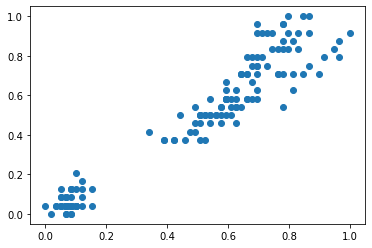

In [100]:
plt.scatter(df['petal length (cm)'],df['petal width (cm)'])

In [101]:
from sklearn.preprocessing import MinMaxScaler

In [102]:
km = KMeans(n_clusters=2)
km

KMeans(n_clusters=2)

In [103]:
y_predicted = km.fit_predict(df[['petal length (cm)','petal width (cm)']])
y_predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [105]:
df['cluster'] = y_predicted
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,cluster
0,5.1,3.5,0.067797,0.041667,0,0
1,4.9,3.0,0.067797,0.041667,0,0
2,4.7,3.2,0.050847,0.041667,0,0
3,4.6,3.1,0.084746,0.041667,0,0
4,5.0,3.6,0.067797,0.041667,0,0


No handles with labels found to put in legend.


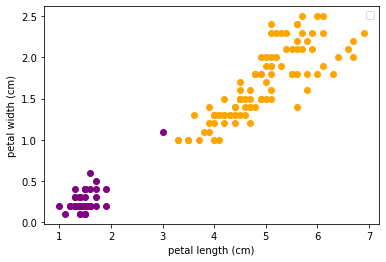

In [81]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
plt.scatter(df1[['petal length (cm)']],df1['petal width (cm)'],color='purple')
plt.scatter(df2[['petal length (cm)']],df2['petal width (cm)'],color='orange')
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.legend()

In [94]:
scaler = MinMaxScaler()
scaler.fit(df[['petal length (cm)']])
df[['petal length (cm)']] = scaler.transform(df[['petal length (cm)']])

scaler.fit(df[['petal width (cm)']])
df[['petal width (cm)']] = scaler.transform(df[['petal width (cm)']])
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,cluster
0,5.1,3.5,0.067797,0.041667,0,0
1,4.9,3.0,0.067797,0.041667,0,0
2,4.7,3.2,0.050847,0.041667,0,0
3,4.6,3.1,0.084746,0.041667,0,0
4,5.0,3.6,0.067797,0.041667,0,0
...,...,...,...,...,...,...
145,6.7,3.0,0.711864,0.916667,2,1
146,6.3,2.5,0.677966,0.750000,2,1
147,6.5,3.0,0.711864,0.791667,2,1
148,6.2,3.4,0.745763,0.916667,2,1


In [106]:
km = KMeans(n_clusters=2)
y_predicted = km.fit_predict(df[['petal length (cm)','petal width (cm)']])
y_predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

No handles with labels found to put in legend.


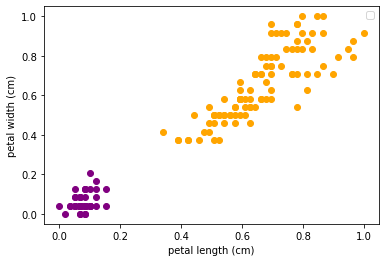

In [113]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]

plt.scatter(df1[['petal length (cm)']],df1['petal width (cm)'],color='purple')
plt.scatter(df2[['petal length (cm)']],df2['petal width (cm)'],color='orange')

plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.legend()

In [111]:
km.cluster_centers_

array([[0.07830508, 0.06083333],
       [0.6620339 , 0.65666667]])

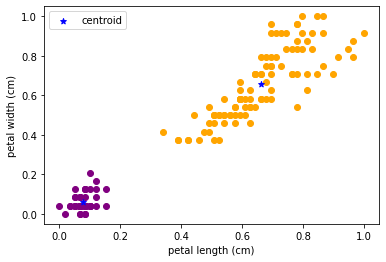

In [115]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
plt.scatter(df1[['petal length (cm)']],df1['petal width (cm)'],color='purple')
plt.scatter(df2[['petal length (cm)']],df2['petal width (cm)'],color='orange')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='blue',marker='*',label='centroid')
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.legend()

In [127]:
k_rng = range(1, 10)
sse = []
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['petal length (cm)','petal width (cm)']])
    sse.append(km.inertia_)
sse

C:\Users\Joshua\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[28.36835321972719,
 5.176463590044366,
 1.701874688192097,
 1.1588792731667128,
 0.8538617353912238,
 0.6798101576314028,
 0.5656776810037092,
 0.48648242367753186,
 0.4136372577940613]

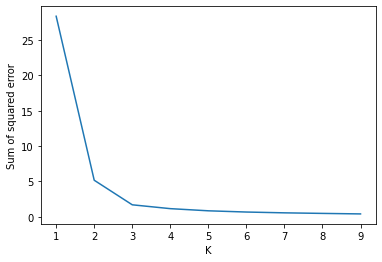

In [128]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)